The following code is to make basic analysis on the data survey data.
Planned:
- Age distribution
- Gender distribution
- Geographical location
- Academic institutions distribution
- Devices needed

In [17]:
#import necessary libraries
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import unidecode
import os

In [20]:


# where all survey answers are stored:
filePath = "/home/andre/Documents/GitHub/amchagas/map_fosh_demand/survey/answers/"

#use code to take all the file names from that folder:
fileNames = os.listdir(filePath)


['RdP_FOSH_20180923_form_responses_1.tsv']

In [21]:
#
allEntries = list() # create list to hold answers
allHeaders = list() # create list to hold headers (questions in each language)
for file in fileNames:
    fh = open(filePath+file,"r") #file handle just for first file for now
    rawData = csv.reader(fh,dialect = csv.excel_tab) # create iterator for the tsv separated file 
    first_read = 1
    
    for entry in rawData: # run the iterator
        if first_read == 1:
            allHeaders.append(entry)
            first_read = 0
        else:
            allEntries.append(entry) #append each run to list

    fh.close() # whend done, close file

In [30]:


headers = pd.DataFrame(allHeaders)
data = pd.DataFrame(allEntries) # transform list into pandas data frame

headers



,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,Timestamp,Sexo:,Idade (em anos),País:,Estado:,Cidade:,Escolaridade:,Formação:,Possui vínculo com alguma instituição?,"Se sim, qual o nome dessa instituição? (opcional)",...,"Poderia em algumas palavras, nos dizer a razão?",Qual(is) equipamento(s) o seu laboratório mais...,Algum projeto já teve de ser alterado por falt...,"Se sim, qual equipamento causou a alteração no...",Caso tenha ocorrido alguma alteração de projet...,Se você pudesse comprar um equipamento novo pa...,Considera viável a opção de adquirir equipamen...,Já teve oportunidade de testar equipamentos de...,Caso já tenha testado produtos de uma nova mar...,"Gostaria de ter acesso, para testes, à equipam..."


In [46]:

#use the index on the left in headers (printed above) to change the language of the questions.
#change the code below in where there are brackets with a number inside to the index number you picked:
#eg headers.loc[0][:] to headers.loc[1][:] (when more languages are available)
#All data from all languages will still be pooled together

data.set_axis([list(range(len(headers.loc[0][:]))),headers.loc[0][:]],axis=1,inplace=True)



In [71]:
#clean data by making all strings lower case with no accents, and removing trailling "." and empty spaces

for column in data:
    data[column] = lowers = [str.lower(i) for i in data[column] ]
    data[column] = [unidecode.unidecode(i) for i in data[column]]
    #print(column)
    for i in range(len(data[column])):# run through all columns
        if len(data[column][i])>0: # exception handling. When people leave an answer blank
            if data[column][i][-1] == " " or data[column][i][-1] == ".":   # remove trailing punctuation
                data[column][i] = data[column][i][:-1]


In [86]:
#get counts for all columns (to plot histograms of the answers)
allCounts = list()
for column in data:
        anssub = list(data[column])
        allCounts.append(dict((x, anssub.count(x)) for x in anssub))

In [88]:
allCounts

[{'8/22/2018 20:04:49': 1,
  '8/22/2018 20:50:50': 1,
  '8/22/2018 20:57:05': 1,
  '8/22/2018 21:09:13': 1,
  '8/22/2018 21:30:34': 1,
  '8/22/2018 21:34:34': 1,
  '8/22/2018 21:35:17': 1,
  '8/22/2018 21:38:24': 1,
  '8/22/2018 21:52:10': 1,
  '8/22/2018 22:24:21': 1,
  '8/22/2018 22:34:04': 1,
  '8/22/2018 22:34:33': 1,
  '8/22/2018 22:44:32': 1,
  '8/22/2018 22:48:32': 1,
  '8/22/2018 22:55:32': 1,
  '8/22/2018 23:31:11': 1,
  '8/22/2018 23:40:24': 1,
  '8/23/2018 0:35:20': 1,
  '8/23/2018 0:46:27': 1,
  '8/23/2018 0:56:42': 1,
  '8/23/2018 11:31:33': 1,
  '8/23/2018 12:59:04': 1,
  '8/23/2018 13:18:28': 1,
  '8/23/2018 13:49:12': 1,
  '8/23/2018 14:08:42': 1,
  '8/23/2018 15:26:57': 1,
  '8/23/2018 18:03:00': 1,
  '8/23/2018 18:53:46': 1,
  '8/23/2018 1:08:53': 1,
  '8/23/2018 1:36:21': 1,
  '8/23/2018 1:47:28': 1,
  '8/23/2018 22:04:45': 1,
  '8/23/2018 22:11:50': 1,
  '8/23/2018 23:06:55': 1,
  '8/23/2018 2:19:26': 1,
  '8/23/2018 2:19:42': 1,
  '8/23/2018 2:25:26': 1,
  '8/23/20

/home/andre/local_software/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


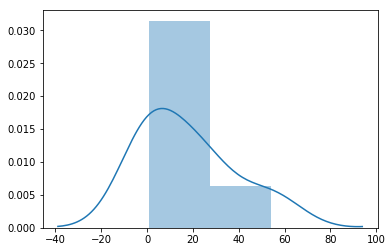

In [95]:
entry = 21
sns.distplot?
sns.distplot(list(allCounts[entry].values()),label=list(allCounts[entry].keys()))
#sns.distplot(pd.to_numeric(data["Idade (em anos)"]),bins=range(10,90,1))
plt.show()


In [34]:
dummie = pd.DataFrame(index=[0,1,2], columns=[[1,2,3],["t1","r2","r3"]])

In [35]:
dummie

,1,2,3
,t1,r2,r3
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
